# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [101]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [102]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

### a. My Answer

In [103]:
print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

[1 4 7]
[2 5 8]
[3 6 9]


These resulting vectors make sense, because e_1 selects the first column of A, e_2 the second column, and e_3 the third. This is because the indices of our vector correspond to columns in the matrix, i.e. when there's a 1 in the first index of the array, it's multiplied into the first column, when there's a 0 in the second index of the vector, it's multiplied into second column. By setting only one item in the vector to 1 and the others to zero, we effectively return a single column of A since all the other columns are multiplied by zero. 

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [104]:
u = np.ones(3)

### b. My Answer

In [105]:
A @ u

array([ 6., 15., 24.])

This returns the sum of each row. This makes sense because u multiplies each value in the row by 1, and by the definition of matrix multiplication we then add each item in the row. 

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [106]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


### c. My Answer

In [107]:
A @ x

array([-2,  4, 11])

Much like part a., here when we multiply x into A, the indices of the rows of A effectively each correspond to the indices of each item in the vector. This is because each time we multiply x into A, only one item is kept while the rest are multiplied by 0, and we do this once for every item. Since the identity matrix behaves like this, any time we multiply an identity matrix by any vector we will get that same vector back.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [108]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


### d. My Answer

In [109]:
A @ x

array([11, -2,  4])

Because the ones are not on the diagonal, the indices of the 1's in the rows of A are not in ascending order (i.e. here it's 3, 1, 2), so the items in x have a different order in the output than they did in x. 

In [110]:
B = np.array([ [1,0,0],
              [0,0,1],
              [0,1,0]])
x = np.array([-2,4,11])

B @ x

array([-2, 11,  4])

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [111]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


### e. My Answer

In [112]:
A @ e_1
A @ e_2
A @ e_3

array([0.18358131, 0.37907577, 0.43734292])

Since we've established that each vector e_1, e_2, and e_3 corresponds to a column that will be selected in A, here multiplying by an e_j vector chooses which j starting position we're transitioning from. The column that is returned contains the probability of transitioning to each i state. 

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [113]:
print(A @ A @ A @ A @ A @ e_1)
print(A @ A @ A @ A @ A @ e_2)
print(A @ A @ A @ A @ A @ e_3)

[0.29266551 0.27862515 0.42870935]
[0.29197422 0.27979983 0.42822595]
[0.29171646 0.2802254  0.42805814]


For each starting vector we get roughly [0.29, 0.28, 0.43]. It seems that as we continue to multiply A times that vector, the result converges to certain values.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [114]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

### My Answers

In [115]:
x = np.array([1,0])

T @ x

array([0.25, 0.75])

[ 0.25 , 0.5 ] [1]       [ 0.25(1) + 0.5(0)]      [0.25]
                   -->                        --> 
[ 0.75 , 0.5 ] [0]       [ 0.75(1) + 0.5(0)]      [0.75]

This object I'm looking at represents the probability of each transition that originates FROM state 1. 0.25 represents going from states 1 to 1, 0.75 represents going from states 1 to 2. 

(the formatting of this is off, but I hope you can still understand. I'm not sure how I can "write out the result in terms of the formula" without some pretty complex LaTeX)

In [117]:
T @ T @ x

array([0.4375, 0.5625])

Multiplying by T again returns another set of probabilities, this time it is predicting the transitions starting at state 1 (1 to 1, 1 to 2) for two steps down the road. 

In [126]:
print(T @ T @ T @ x, '3 Ts')
print(T @ T @ T @ T @ x, '4 Ts')
print(T @ T @ T @ T @ T @ x, '5 Ts')
print(T @ T @ T @ T @ T @ T @ x, '6 Ts')
print(T @ T @ T @ T @ T @ T @ T @ x, '7 Ts')
print(T @ T @ T @ T @ T @ T @ T @ T @ x, '8 Ts')
print(T @ T @ T @ T @ T @ T @ T @ T @ T @ x, '9 Ts')
print(T @ T @ T @ T @ T @ T @ T @ T @ T @ T @ x, '10 Ts')
print(T @ T @ T @ T @ T @ T @ T @ T @ T @ T @ T @ x, '11 Ts')

[0.390625 0.609375] 3 Ts
[0.40234375 0.59765625] 4 Ts
[0.39941406 0.60058594] 5 Ts
[0.40014648 0.59985352] 6 Ts
[0.39996338 0.60003662] 7 Ts
[0.40000916 0.59999084] 8 Ts
[0.39999771 0.60000229] 9 Ts
[0.40000057 0.59999943] 10 Ts
[0.39999986 0.60000014] 11 Ts


Continuing to multiply the vector outcomes by T, the result begins to settle down when we multiply the vector by T five times, though it does bounce around a little bit from there. 

In [129]:
y = np.array([0,1])

print(T @ y, 'T @ y\n')

print(T @ T @ y, '2 Ts')
print(T @ T @ T @ y, '3 Ts')
print(T @ T @ T @ T @ y, '4 Ts')
print(T @ T @ T @ T @ T @ y, '5 Ts')
print(T @ T @ T @ T @ T @ T @ y, '6 Ts')
print(T @ T @ T @ T @ T @ T @ T @ y, '7 Ts')

[0.5 0.5] T @ y

[0.375 0.625] 2 Ts
[0.40625 0.59375] 3 Ts
[0.3984375 0.6015625] 4 Ts
[0.40039062 0.59960938] 5 Ts
[0.39990234 0.60009766] 6 Ts
[0.40002441 0.59997559] 7 Ts


We actually get the SAME result in the long run when we change the initial condition to [0,1].

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

(The following code is written with guidance from Terry)

In [6]:
with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

print(len(data))
data[0]

print(type(data[2]))

1000
<class 'pandas.core.series.Series'>


In [ ]:
# Investigating all the states
print(len(set(data[0])))
print(set(data[0]))

33
{'Morningside Heights', 'Inwood', 'Civic Center', 'Chelsea', 'Theater District', 'Battery Park City', 'NoHo', 'Financial District', 'SoHo', 'Kips Bay', 'Outside Manhattan', 'Central Park', 'Lower East Side', 'East Harlem', 'Gramercy', 'Washington Heights', 'Tribeca', 'West Village', 'Murray Hill', 'Little Italy', 'Upper East Side', 'Flatiron District', 'Chinatown', 'Two Bridges', "Hell's Kitchen", 'Upper West Side', 'East Village', 'Harlem', 'Greenwich Village', 'Stuyvesant Town', 'Nolita', 'Roosevelt Island', 'Midtown'}


In [12]:
# Getting unique rows from the data?
states = set(data[0])
for i in range(1,len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i)
states = list(states)

In [ ]:
states

38

In [ ]:
## Compute transition counts
S = len(states)
tr_counts = np.zeros((S,S))

for trip in data:
    seq = np.array(trip)
    for t in range(1, len(seq)):
        # Current and next tokens
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts
        tr_counts[index_from, index_to] += 1

print('Transition Counts\n', tr_counts)

Transition Counts
 [[3.239700e+04 3.100000e+01 4.180000e+02 ... 1.060000e+02 2.500000e+01
  1.021700e+04]
 [3.700000e+01 6.390000e+02 2.000000e+00 ... 2.000000e+00 1.000000e+00
  2.070000e+02]
 [1.745000e+03 0.000000e+00 9.800000e+02 ... 1.500000e+01 4.000000e+00
  9.110000e+02]
 ...
 [1.270000e+02 3.000000e+00 2.600000e+01 ... 1.683800e+04 1.900000e+01
  7.344000e+03]
 [2.200000e+01 3.000000e+00 6.000000e+00 ... 1.100000e+01 9.750000e+02
  1.219000e+03]
 [8.608000e+03 2.690000e+02 1.386000e+03 ... 7.000000e+03 1.426000e+03
  1.389343e+06]]


In [ ]:
# Sum transititon counts bt row:
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State propotyions: 

[[1.627050e+05 3.603000e+03 1.431200e+04 5.790800e+04 1.978283e+06
  8.740550e+05 2.292330e+05 3.000000e+00 1.743220e+05 4.415950e+05
  5.505970e+05 5.077760e+05 2.363961e+06 3.701250e+05 3.705660e+05
  3.168490e+05 5.017430e+05 4.930000e+02 7.253000e+04 4.086400e+05
  8.393620e+05 6.543970e+05 1.200000e+01 3.859100e+04 2.797713e+06
  3.952740e+05 1.058730e+05 1.038800e+04 1.224325e+06 1.803491e+06
  8.886440e+05 2.171620e+05 1.000000e+00 5.102620e+05 1.112860e+05
  1.063770e+05 8.010000e+03 3.851929e+06]]


In [19]:
# Normalize transition count matrix to get proportions
tr_pr = np.divide(tr_counts, sums,
                  out=np.zeros_like(tr_counts),
                  where=sums!=0)
print('State proportions: \n')
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

State proportions: 

                     Morningside Heights  Randall's Island  Inwood  \
Morningside Heights                 0.20              0.01    0.03   
Randall's Island                    0.00              0.18    0.00   
Inwood                              0.01              0.00    0.07   
Civic Center                        0.00              0.00    0.00   
Chelsea                             0.03              0.03    0.08   
Theater District                    0.02              0.01    0.04   
Battery Park City                   0.00              0.00    0.00   
Ellis Island                        0.00              0.00    0.00   
NoHo                                0.00              0.00    0.00   
Financial District                  0.00              0.00    0.01   
SoHo                                0.00              0.01    0.01   
Kips Bay                            0.00              0.01    0.01   
Outside Manhattan                   0.06              0.22    0.10   

<Axes: >

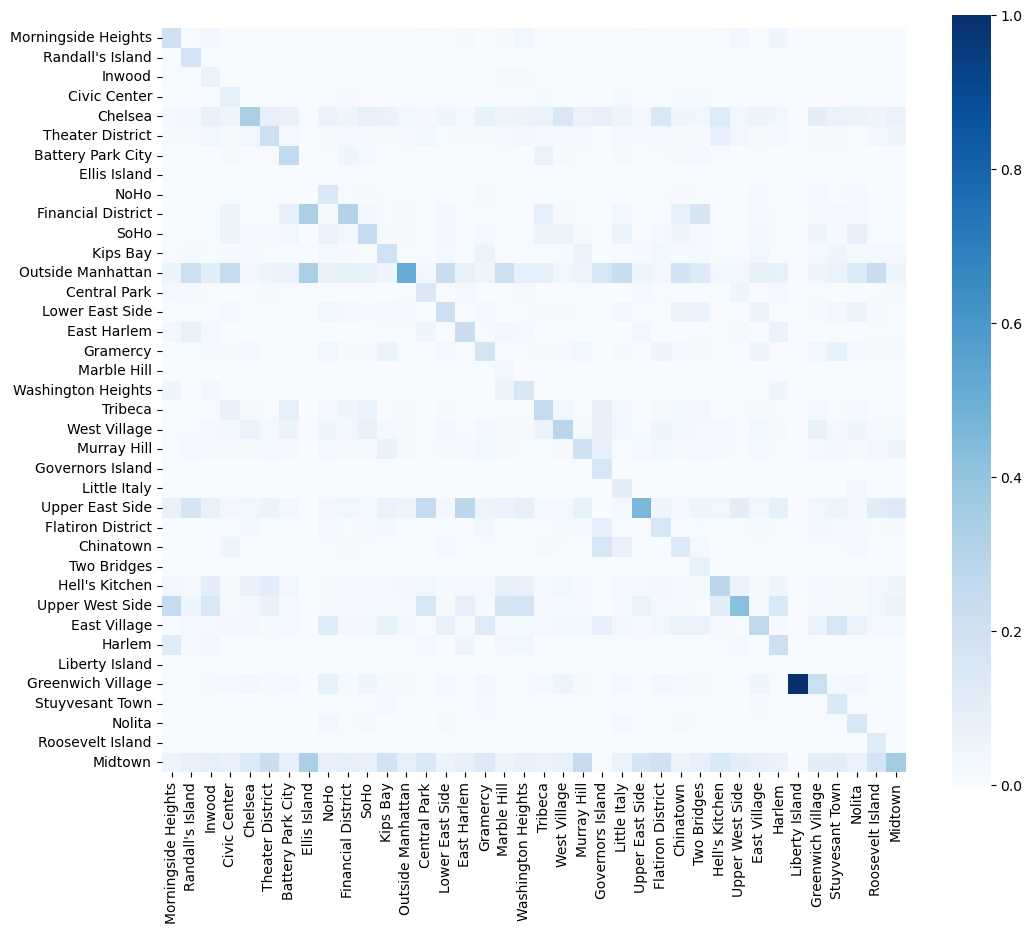

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(tr_pr,
            cmap='Blues',
            square=True,
            xticklabels=states,
            yticklabels=states,)